In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd

## Prepare data
use DataFrame for convenience in python

In [2]:
with open("static/aurindata.json") as f:
    data = json.load(f)
data[:2]

[{'feature_n2': 'Somerville',
  'sa2_main16': '214021385',
  'median_tot_hhd_inc_weekly': 1479,
  'median_mortgage_repay_monthly': 1600,
  'median_rent_weekly': 323,
  'median_tot_fam_inc_weekly': 1722,
  'median_tot_prsnl_inc_weekly': 667},
 {'feature_n2': 'Rosebud - McCrae',
  'sa2_main16': '214021384',
  'median_tot_hhd_inc_weekly': 930,
  'median_mortgage_repay_monthly': 1517,
  'median_rent_weekly': 285,
  'median_tot_fam_inc_weekly': 1242,
  'median_tot_prsnl_inc_weekly': 511}]

In [3]:
df = pd.DataFrame.from_records(data)
df.tail()

,feature_n2,sa2_main16,median_tot_hhd_inc_weekly,median_mortgage_repay_monthly,median_rent_weekly,median_tot_fam_inc_weekly,median_tot_prsnl_inc_weekly
304,Collingwood,206071141,1712,2180,400,2200,969
305,Prahran - Windsor,206061136,1841,2167,400,2530,1083
306,Cranbourne West,212031304,1564,1733,336,1600,707
307,Cranbourne South,212031303,1865,2080,350,1990,742
308,Cranbourne North,212031302,1591,1754,345,1662,668


In [4]:
# sorted df for each property
mortgage = df.sort_values(by=["median_mortgage_repay_monthly"], ascending=False).loc[:, ["feature_n2", "sa2_main16", "median_mortgage_repay_monthly"]].iloc[:-5]
rent = df.sort_values(by=["median_rent_weekly"], ascending=False).loc[:, ["feature_n2", "sa2_main16", "median_rent_weekly"]].iloc[:-5]
familyinc = df.sort_values(by=["median_tot_fam_inc_weekly"], ascending=False).loc[:, ["feature_n2", "sa2_main16", "median_tot_fam_inc_weekly"]].iloc[:-4]
householdinc = df.sort_values(by=["median_tot_hhd_inc_weekly"], ascending=False).loc[:, ["feature_n2", "sa2_main16", "median_tot_hhd_inc_weekly"]].iloc[:-3]
personalinc = df.sort_values(by=["median_tot_prsnl_inc_weekly"], ascending=False).loc[:, ["feature_n2", "sa2_main16", "median_tot_prsnl_inc_weekly"]].iloc[:-3]

## Basic analysis and visualisation

In [5]:
df.corr()

,median_tot_hhd_inc_weekly,median_mortgage_repay_monthly,median_rent_weekly,median_tot_fam_inc_weekly,median_tot_prsnl_inc_weekly
median_tot_hhd_inc_weekly,1.000000,0.769618,0.626749,0.878081,0.794705
median_mortgage_repay_monthly,0.769618,1.000000,0.762497,0.847827,0.566342
median_rent_weekly,0.626749,0.762497,1.000000,0.685249,0.464874
median_tot_fam_inc_weekly,0.878081,0.847827,0.685249,1.000000,0.791380
median_tot_prsnl_inc_weekly,0.794705,0.566342,0.464874,0.791380,1.000000


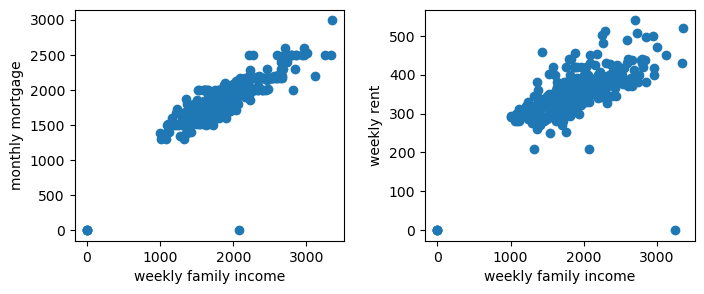

In [6]:
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.scatter(df["median_tot_fam_inc_weekly"], df["median_mortgage_repay_monthly"])
plt.xlabel("weekly family income")
plt.ylabel("monthly mortgage")

plt.subplot(1, 2, 2)
plt.scatter(df["median_tot_fam_inc_weekly"], df["median_rent_weekly"])
plt.xlabel("weekly family income")
plt.ylabel("weekly rent")

plt.subplots_adjust(wspace=0.3)
plt.show()

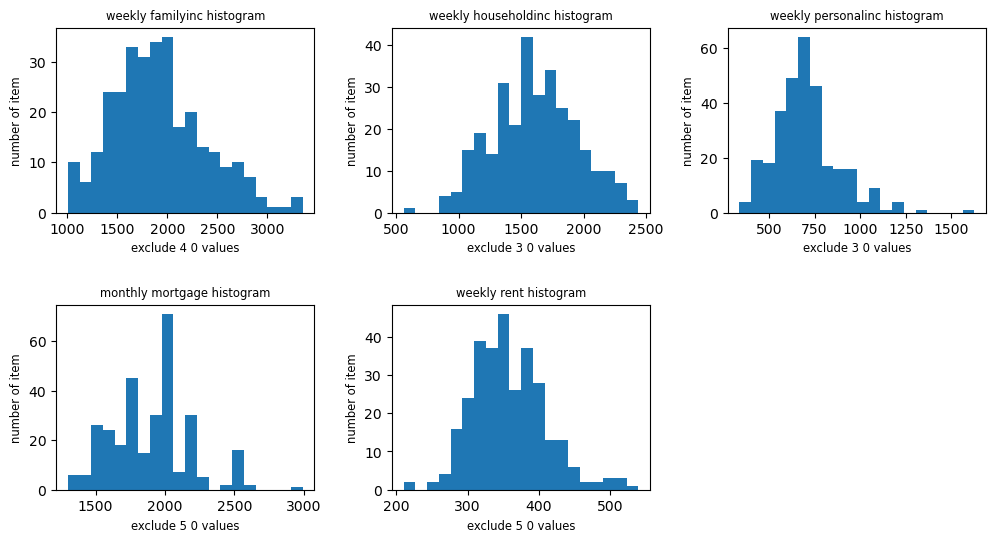

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.hist(familyinc["median_tot_fam_inc_weekly"], bins=20)
plt.xlabel("exclude 4 0 values", fontsize="small")
plt.ylabel("number of item", fontsize="small")
plt.title("weekly familyinc histogram", fontsize="small")

plt.subplot(2, 3, 2)
plt.hist(householdinc["median_tot_hhd_inc_weekly"], bins=20)
plt.xlabel("exclude 3 0 values", fontsize="small")
plt.ylabel("number of item", fontsize="small")
plt.title("weekly householdinc histogram", fontsize="small")

plt.subplot(2, 3, 3)
plt.hist(personalinc["median_tot_prsnl_inc_weekly"], bins=20)
plt.xlabel("exclude 3 0 values", fontsize="small")
plt.ylabel("number of item", fontsize="small")
plt.title("weekly personalinc histogram", fontsize="small")

plt.subplot(2, 3, 4)
plt.hist(mortgage["median_mortgage_repay_monthly"], bins=20)
plt.xlabel("exclude 5 0 values", fontsize="small")
plt.ylabel("number of item", fontsize="small")
plt.title("monthly mortgage histogram", fontsize="small")

plt.subplot(2, 3, 5)
plt.hist(rent["median_rent_weekly"], bins=20)
plt.xlabel("exclude 5 0 values", fontsize="small")
plt.ylabel("number of item", fontsize="small")
plt.title("weekly rent histogram", fontsize="small")

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

#### Top10 largest for each property

In [8]:
mortgage.head(10)

,feature_n2,sa2_main16,median_mortgage_repay_monthly
219,Brighton (Vic.),208011169,2992
221,Beaumaris,208011168,2600
235,Surrey Hills (West) - Canterbury,207011155,2600
239,Glen Iris - East,207011150,2529
242,Camberwell,207011149,2500
187,Ivanhoe East - Eaglemont,209011201,2500
257,Albert Park,206051128,2500
250,Toorak,206061138,2500
150,Melbourne Airport,210051248,2500
236,Kew East,207011154,2500


In [9]:
rent.head(10)

,feature_n2,sa2_main16,median_rent_weekly
221,Beaumaris,208011168,540
219,Brighton (Vic.),208011169,521
278,Southbank,206041126,512
295,Brighton East,208011170,508
289,Docklands,206041118,501
257,Albert Park,206051128,500
268,Port Melbourne,206051130,496
248,Carlton North - Princes Hill,206071140,490
241,Balwyn North,207011148,481
239,Glen Iris - East,207011150,470


In [10]:
familyinc.head(10)

,feature_n2,sa2_main16,median_tot_fam_inc_weekly
219,Brighton (Vic.),208011169,3351
250,Toorak,206061138,3340
150,Melbourne Airport,210051248,3249
288,East Melbourne,206041119,3120
239,Glen Iris - East,207011150,3007
187,Ivanhoe East - Eaglemont,209011201,2961
235,Surrey Hills (West) - Canterbury,207011155,2961
257,Albert Park,206051128,2946
201,Malvern - Glen Iris,208041194,2853
268,Port Melbourne,206051130,2852


In [11]:
householdinc.head(10)

,feature_n2,sa2_main16,median_tot_hhd_inc_weekly
239,Glen Iris - East,207011150,2438
187,Ivanhoe East - Eaglemont,209011201,2416
219,Brighton (Vic.),208011169,2409
235,Surrey Hills (West) - Canterbury,207011155,2341
136,Lysterfield,211011255,2337
121,Warrandyte - Wonga Park,211021262,2333
250,Toorak,206061138,2313
193,Research - North Warrandyte,209031214,2295
288,East Melbourne,206041119,2285
244,Ashburton (Vic.),207011146,2251


In [12]:
personalinc.head(10)

,feature_n2,sa2_main16,median_tot_prsnl_inc_weekly
255,Port Melbourne Industrial,206051131,1625
288,East Melbourne,206041119,1341
268,Port Melbourne,206051130,1223
284,South Yarra - West,206041125,1220
250,Toorak,206061138,1217
257,Albert Park,206051128,1180
256,Elwood,206051129,1164
251,South Yarra - East,206061137,1104
246,Richmond (Vic.),206071144,1102
305,Prahran - Windsor,206061136,1083


## Some other thoughts
not a very good statistic, but maybe can be compared with tweet data to see if there's any match

In [13]:
df.insert(4, "median_mortgage_weekly_average", df["median_mortgage_repay_monthly"].div(4))
df.tail()

,feature_n2,sa2_main16,median_tot_hhd_inc_weekly,median_mortgage_repay_monthly,median_mortgage_weekly_average,median_rent_weekly,median_tot_fam_inc_weekly,median_tot_prsnl_inc_weekly
304,Collingwood,206071141,1712,2180,545.00,400,2200,969
305,Prahran - Windsor,206061136,1841,2167,541.75,400,2530,1083
306,Cranbourne West,212031304,1564,1733,433.25,336,1600,707
307,Cranbourne South,212031303,1865,2080,520.00,350,1990,742
308,Cranbourne North,212031302,1591,1754,438.50,345,1662,668


In [14]:
df[(df == 0).any(1)]

,feature_n2,sa2_main16,median_tot_hhd_inc_weekly,median_mortgage_repay_monthly,median_mortgage_weekly_average,median_rent_weekly,median_tot_fam_inc_weekly,median_tot_prsnl_inc_weekly
150,Melbourne Airport,210051248,2250,2500,625.0,0,3249,919
202,Essendon Airport,210011227,0,0,0.0,0,0,0
209,Moorabbin Airport,208031192,0,0,0.0,0,0,0
255,Port Melbourne Industrial,206051131,1874,0,0.0,0,0,1625
270,West Melbourne,206041127,0,0,0.0,0,0,0
279,Braeside,208031184,900,0,0.0,357,2074,900


In [15]:
df_no0 = df[(df != 0).all(1)].loc[:, ["feature_n2", "median_mortgage_weekly_average", "median_rent_weekly", "median_tot_fam_inc_weekly", "median_tot_prsnl_inc_weekly"]]
df_no0.insert(5, "mortgageVSfamilyinc_weekly", df_no0["median_mortgage_weekly_average"].div(df_no0["median_tot_fam_inc_weekly"]))
df_no0.insert(6, "rentVSfamilyinc_weekly", df_no0["median_rent_weekly"].div(df_no0["median_tot_fam_inc_weekly"]))
df_no0.insert(7, "mortgageVSpersonalinc_weekly", df_no0["median_mortgage_weekly_average"].div(df_no0["median_tot_prsnl_inc_weekly"]))
df_no0.insert(8, "rentVSpersonalinc_weekly", df_no0["median_rent_weekly"].div(df_no0["median_tot_prsnl_inc_weekly"]))
df_no0.tail()

,feature_n2,median_mortgage_weekly_average,median_rent_weekly,median_tot_fam_inc_weekly,median_tot_prsnl_inc_weekly,mortgageVSfamilyinc_weekly,rentVSfamilyinc_weekly,mortgageVSpersonalinc_weekly,rentVSpersonalinc_weekly
304,Collingwood,545.00,400,2200,969,0.247727,0.181818,0.562436,0.412797
305,Prahran - Windsor,541.75,400,2530,1083,0.214130,0.158103,0.500231,0.369344
306,Cranbourne West,433.25,336,1600,707,0.270781,0.210000,0.612801,0.475248
307,Cranbourne South,520.00,350,1990,742,0.261307,0.175879,0.700809,0.471698
308,Cranbourne North,438.50,345,1662,668,0.263839,0.207581,0.656437,0.516467


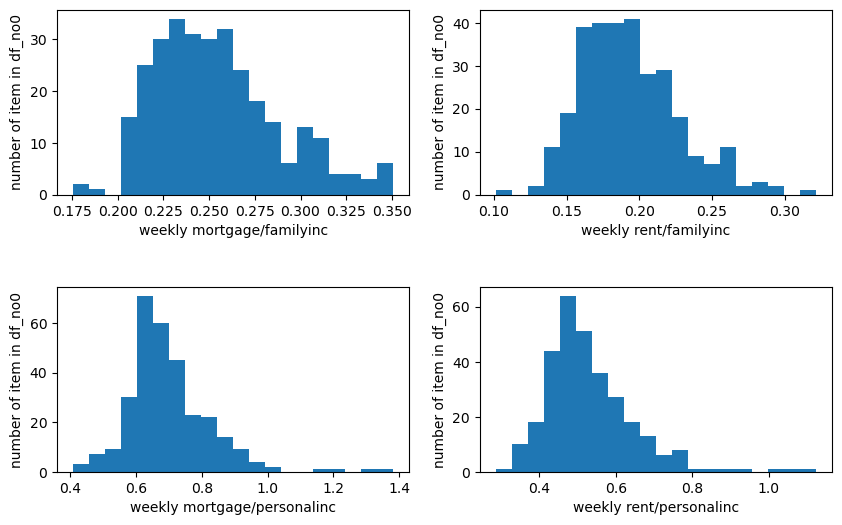

In [16]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.hist(df_no0["mortgageVSfamilyinc_weekly"], bins=20)
plt.xlabel("weekly mortgage/familyinc")
plt.ylabel("number of item in df_no0")

plt.subplot(2,2,2)
plt.hist(df_no0["rentVSfamilyinc_weekly"], bins=20)
plt.xlabel("weekly rent/familyinc")
plt.ylabel("number of item in df_no0")

plt.subplot(2,2,3)
plt.hist(df_no0["mortgageVSpersonalinc_weekly"], bins=20)
plt.xlabel("weekly mortgage/personalinc")
plt.ylabel("number of item in df_no0")

plt.subplot(2,2,4)
plt.hist(df_no0["rentVSpersonalinc_weekly"], bins=20)
plt.xlabel("weekly rent/personalinc")
plt.ylabel("number of item in df_no0")

plt.subplots_adjust(hspace=0.5)
plt.show()

#### Top10 smallest % of weekly spend on housing/income

In [17]:
# top10 smallest weekly mortgage/familyinc
df_no0.sort_values(by=["mortgageVSfamilyinc_weekly"]).iloc[:10, [0, 1, 3, 5]]

,feature_n2,median_mortgage_weekly_average,median_tot_fam_inc_weekly,mortgageVSfamilyinc_weekly
288,East Melbourne,548.00,3120,0.175641
284,South Yarra - West,500.00,2815,0.177620
250,Toorak,625.00,3340,0.187126
245,Yarra - North,575.00,2842,0.202322
254,South Melbourne,541.75,2663,0.203436
262,Kensington (Vic.),504.75,2480,0.203528
273,Alphington - Fairfield,500.00,2447,0.204332
256,Elwood,541.75,2635,0.205598
136,Lysterfield,500.00,2423,0.206356
238,Hawthorn,550.00,2661,0.206689


In [18]:
# top10 smallest weekly rent/familyinc
df_no0.sort_values(by=["rentVSfamilyinc_weekly"]).iloc[:10, [0, 2, 3, 6]]

,feature_n2,median_rent_weekly,median_tot_fam_inc_weekly,rentVSfamilyinc_weekly
195,Panton Hill - St Andrews,210,2071,0.101400
250,Toorak,431,3340,0.129042
201,Malvern - Glen Iris,381,2853,0.133544
187,Ivanhoe East - Eaglemont,400,2961,0.135089
260,Armadale,381,2738,0.139153
238,Hawthorn,371,2661,0.139421
235,Surrey Hills (West) - Canterbury,416,2961,0.140493
267,Ascot Vale,326,2313,0.140942
273,Alphington - Fairfield,345,2447,0.140989
43,Williamstown,370,2606,0.141980


In [19]:
# top10 smallest weekly mortgage/personalinc
df_no0.sort_values(by=["mortgageVSpersonalinc_weekly"]).iloc[:10, [0, 1, 4, 7]]

,feature_n2,median_mortgage_weekly_average,median_tot_prsnl_inc_weekly,mortgageVSpersonalinc_weekly
288,East Melbourne,548.00,1341,0.408650
284,South Yarra - West,500.00,1220,0.409836
251,South Yarra - East,500.00,1104,0.452899
256,Elwood,541.75,1164,0.465421
285,Flemington Racecourse,497.75,1062,0.468691
253,St Kilda,500.00,1020,0.490196
262,Kensington (Vic.),504.75,1012,0.498765
246,Richmond (Vic.),550.00,1102,0.499093
305,Prahran - Windsor,541.75,1083,0.500231
249,Abbotsford,535.50,1068,0.501404


In [20]:
# top10 smallest weekly rent/personalinc
df_no0.sort_values(by=["rentVSpersonalinc_weekly"]).iloc[:10, [0, 2, 4, 8]]

,feature_n2,median_rent_weekly,median_tot_prsnl_inc_weekly,rentVSpersonalinc_weekly
195,Panton Hill - St Andrews,210,733,0.286494
256,Elwood,390,1164,0.335052
288,East Melbourne,451,1341,0.336316
284,South Yarra - West,420,1220,0.344262
285,Flemington Racecourse,375,1062,0.353107
250,Toorak,431,1217,0.354150
260,Armadale,381,1064,0.358083
201,Malvern - Glen Iris,381,1041,0.365994
252,St Kilda East,360,981,0.366972
253,St Kilda,375,1020,0.367647
